In [22]:
# analyze training log file: meters.json

import json
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


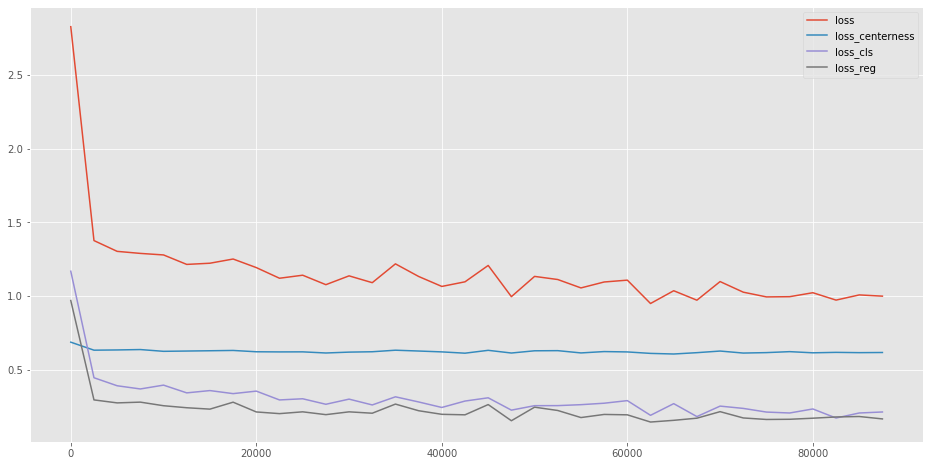

In [23]:
# single model
meters_path = '../training_dir/packdet_R_50_FPN_1x_fe-128-12-2_m4_sep/meters.json'

with open(meters_path, 'r') as f:
    meters = json.load(f)

step = 2500
iterations = range(1,90001,step)
    
loss = meters['loss']['series'][::step]
loss_centerness = meters['loss_centerness']['series'][::step]
loss_cls = meters['loss_cls']['series'][::step]
loss_reg = meters['loss_reg']['series'][::step]

plt.figure(figsize=(16,8))
plt.plot(iterations, loss)
plt.plot(iterations, loss_centerness)
plt.plot(iterations, loss_cls)
plt.plot(iterations, loss_reg)
plt.legend(['loss', 'loss_centerness', 'loss_cls', 'loss_reg'])
plt.show()


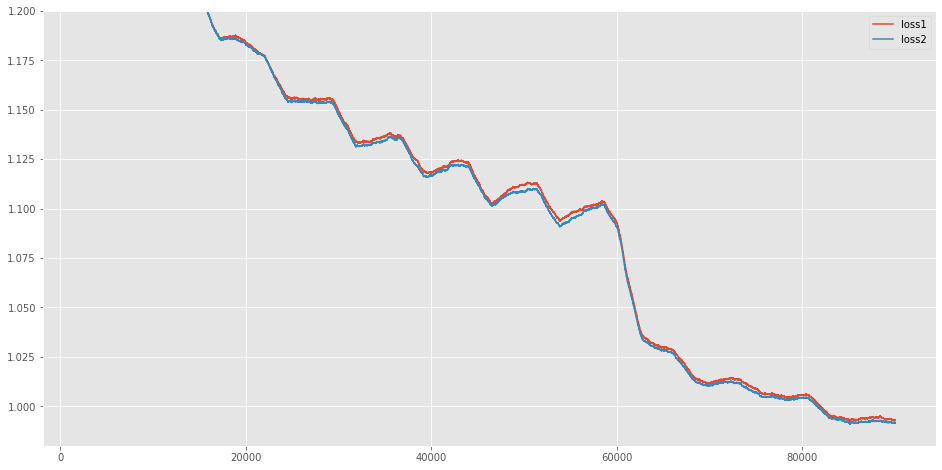

In [63]:
# compare two models
meters_path1 = '../training_dir/packdet_R_50_FPN_1x_fe-128-12-2_m2_sep/meters.json'
meters_path2 = '../training_dir/packdet_R_50_FPN_1x_fe-128-12-2_m4_sep/meters.json'

with open(meters_path1, 'r') as f:
    meters1 = json.load(f)
with open(meters_path2, 'r') as f:
    meters2 = json.load(f)

w = 2500
step = 1
iterations = range(1,90001,step)
iterations = iterations[w-1:]

loss1 = meters1['loss']['series'][::step]
loss_centerness1 = meters1['loss_centerness']['series'][::step]
loss_cls1 = meters1['loss_cls']['series'][::step]
loss_reg1 = meters1['loss_reg']['series'][::step]
loss2 = meters2['loss']['series'][::step]
loss_centerness2 = meters2['loss_centerness']['series'][::step]
loss_cls2 = meters2['loss_cls']['series'][::step]
loss_reg2 = meters2['loss_reg']['series'][::step]

plt.figure(figsize=(16,8))
plt.plot(iterations, moving_average(loss1, w))
plt.plot(iterations, moving_average(loss2, w))
plt.legend(['loss1', 'loss2'])
plt.ylim([0.98,1.2])
plt.show()